## Movie data

In this projet we will be looking into data about the movie industry. 
We will be cleaning the data before looking at factors that contributes to the gross revenue of a movie. 

#### Import

In [1]:
# import
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

# read the data
df = pd.read_csv('movies.csv')

In [37]:
pd.set_option('display.max_rows', 5 )

#### Data exploration and cleaning

In this segment, we learn about the different datatypes, checking for nulls, transforming while also dropping irrelevant columns.

In [3]:
# Check if any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# Change data type of column and transfoming all Nan column into 0 so it can be transformed into int dtype

df.budget = df.budget.fillna(0)
df.gross = df.gross.fillna(0)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [137]:
# Change data type of column

df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')

#### The first problem

Here I encountered the first problem. There is a discrepancy between date released and the year of the movie. What I did to solve this is to split the released date column, drop the extra column and transform the right column into the right format that I wanted. The final version is the column named: 'year_released'

In [6]:
# Correcting year released
df['released'] = df['released'].astype(str)

In [8]:
df[['year_released','country_released']] = df['released'].str.split('(', expand = True)

In [48]:
df = df.drop('country_released', axis = 1)

In [58]:
df['year_released'] = df['year_released'].str[-5:]

In [59]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,2020


#### Visualising correlation 

My Hypothesis going into this:

Budget will have high correlation to gross revenue.

In this segment, we explore different visualisation for the numeric movie features.

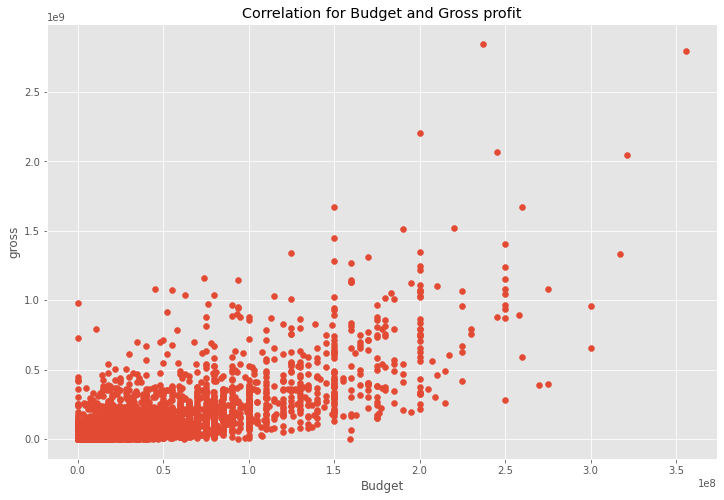

In [15]:
plt.scatter(x = df['budget'], y =df['gross'])
plt.title('Correlation for Budget and Gross profit')
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()

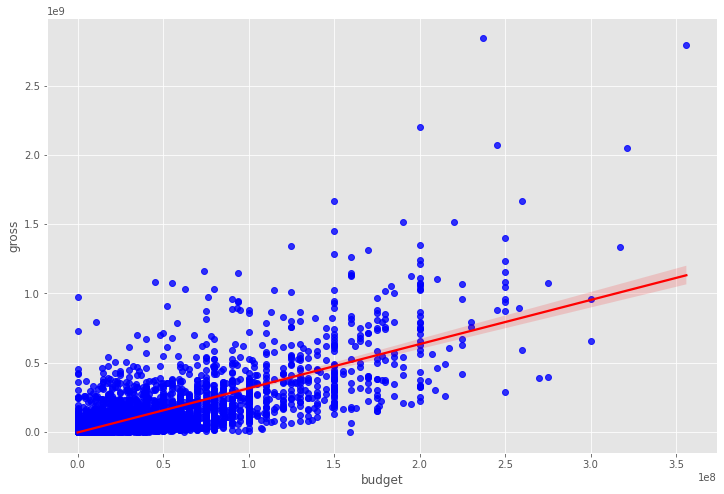

In [24]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color":"blue"}, line_kws = {"color":"red"});

#### Scatterplot for the rest of the numerical features

In [17]:
def plt_scatter(df, cols, col_y = 'gross'):
    for col in cols:
        #fig = plt.figure(figsize = (6,6))
        df.plot.scatter(x=col, y = col_y)
        plt.title("Relationship between gross revenue and and "+col)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()

In [18]:
cols = ['budget', 'score', 'votes', 'runtime' ]

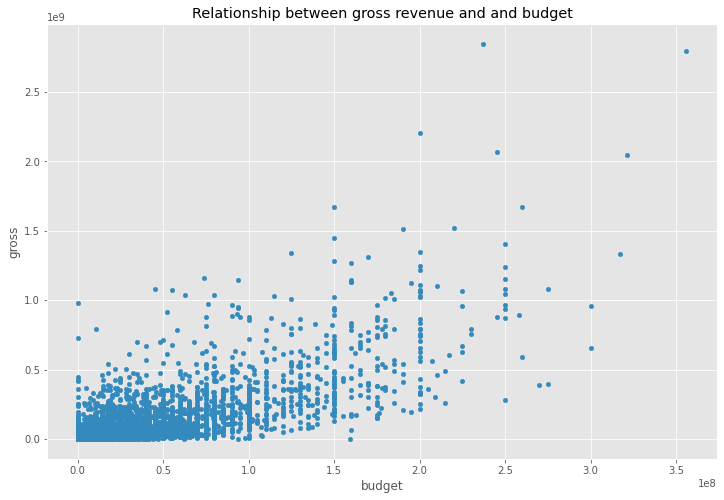

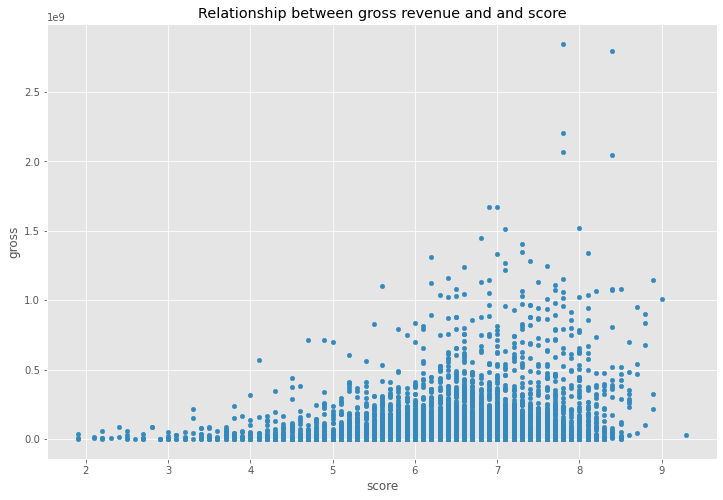

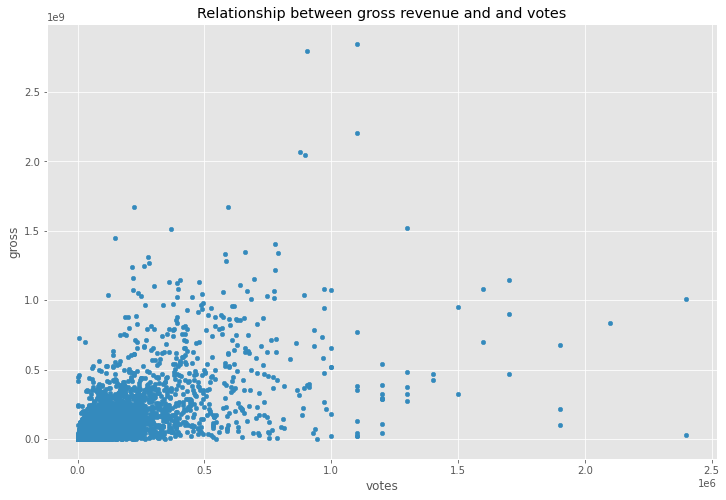

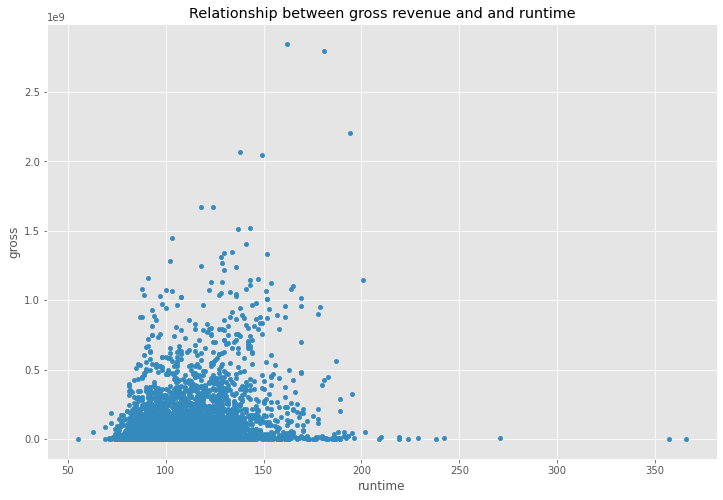

In [19]:
plt_scatter(df,cols)

In [20]:
# Correlation pf budget, score votes and run time

df_num = df[['budget', 'score', 'votes', 'runtime', 'gross']]
df_num

,budget,score,votes,runtime,gross
0,19000000,8.4,927000.0,146.0,46998772
1,4500000,5.8,65000.0,104.0,58853106
2,18000000,8.7,1200000.0,124.0,538375067
3,3500000,7.7,221000.0,88.0,83453539
4,6000000,7.3,108000.0,98.0,39846344
...,...,...,...,...,...
7663,7000,3.1,18.0,90.0,0
7664,0,4.7,36.0,90.0,0
7665,58750,5.7,29.0,NaN,0
7666,15000,NaN,NaN,120.0,0


#### Looking at the 3 different types of correlation methods: Pearson, Kendall and Spearman

In [26]:
df.corr(method= 'pearson') # This is the chosen one for this project.
df.corr(method= 'kendall') 
df.corr(method= 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


#### Creating Correlation Matrix for Movie industry's Numeric Features

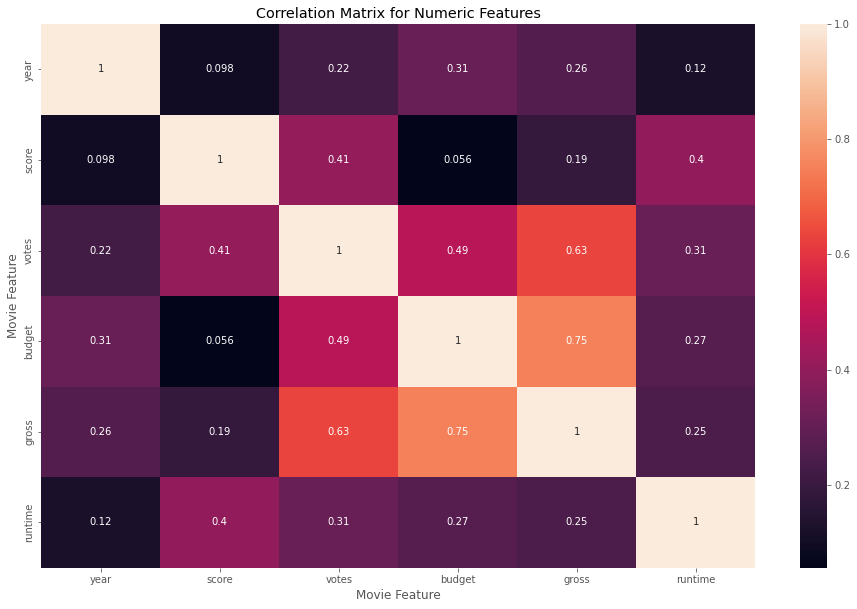

In [39]:
plt.figure(figsize = (16,10))

sns.heatmap(df.corr(), annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

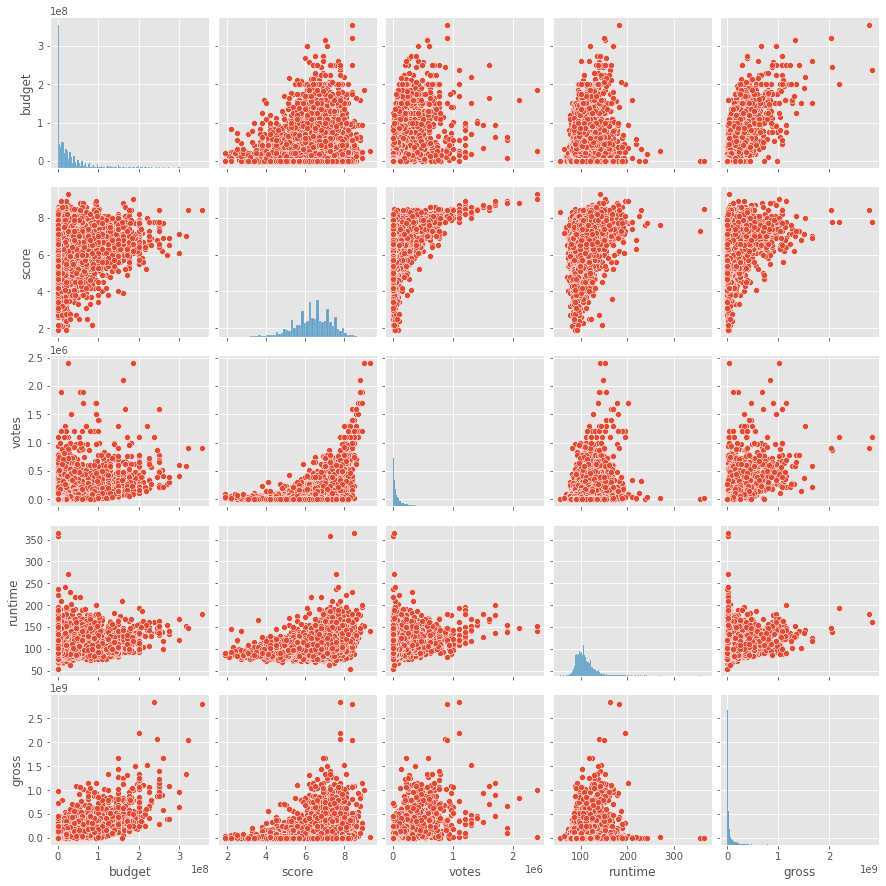

In [161]:
sns.pairplot(df_num)

In [82]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack().sort_values(ascending = False)
pd.set_option('display.max_rows', None)

corr_pairs[(corr_pairs)> 0.5]


year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    budget     0.750157
budget   gross      0.750157
gross    votes      0.632834
votes    gross      0.632834
dtype: float64

#### Insight: Votes and budget have the highest correlation for gross

At the end of this part, my hypothesis was right that budget has a hgh correlation with gross revenue, however, I did not expect that votes also have a strong correlation with gross revenue. 

My take away at this point is that base on this insight, future movies have to have considerable budget but also have the right director and casts to make them likeable, hence higher votes.

#### Breaking down gross by genre

In [91]:
df.genre.unique()

['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', ..., 'Thriller', 'History', 'Mystery', 'Sport', 'Musical']
Length: 19
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Sci-Fi', 'Sport', 'Thriller', 'Western']

In [123]:
df_new = df[['genre', 'gross', 'budget']]

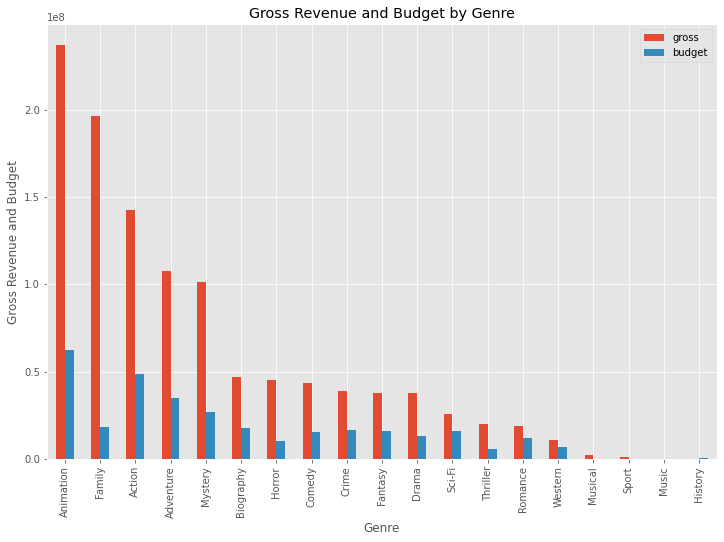

In [122]:
df_new.groupby('genre').mean().astype('int64').sort_values(by= ['gross', 'budget'], ascending = False).plot.bar()
plt.title('Gross Revenue and Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue and Budget')

plt.show()

#### Insight:

We learn that Animation has the largest average gross revenue. While history and sport bring in the least amount of gross revenue. 

Family show came in second in terms of gross revenue, however, on average, it requires lesser budget to produce the movie. This will also imply that while low budget will normally create a lower gross revenue due to their correlation, it is not true for the family genre.

